# Linear Regression on US Housing Price

## Linear regression primer

In statistics, linear regression is a linear approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X. The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.

Linear regression models are often fitted using the least squares approach, but they may also be fitted in other ways, such as by minimizing the "lack of fit" in some other norm (as with least absolute deviations regression), or by minimizing a penalized version of the least squares loss function as in ridge regression ($L_2$-norm penalty) and lasso ($L_1$-norm penalty). Conversely, the least squares approach can be used to fit models that are not linear models. Thus, although the terms "least squares" and "linear model" are closely linked, they are not synonymous.

### Import packages and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv("USA_Housing.csv")


In [4]:
df.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


In [5]:
df.tail(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4990,52723.876555,5.452237,8.124571,6.39,14802.088438,4.795006e+05,"86727 Kelly Plaza\nLake Veronica, IL 04474"
4991,74102.191890,5.657841,7.683993,3.13,24041.270592,1.263721e+06,"2871 John Lodge\nAmychester, GU 61734-5597"
4992,87499.125743,6.403473,4.836091,4.02,40815.199679,1.568701e+06,Unit 2096 Box 9559\nDPO AE 80983-8797
4993,69639.140896,5.007510,7.778375,6.05,54056.128430,1.381831e+06,"5259 David Causeway Apt. 975\nSouth Alexstad, ..."
4994,73060.846226,5.293682,6.312253,4.16,22695.695480,9.053549e+05,"5224 Lamb Passage\nNancystad, GA 16579"
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [10]:
df.sample()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
2674,60421.754086,5.632793,5.781083,4.07,32754.830844,849008.704699,"330 Alexander Square\nNorth Allison, NV 01942-..."


In [11]:
df.sample(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
1226,66141.191596,5.030562,7.876116,3.50,37355.864643,1.148067e+06,"0934 William Centers Suite 482\nJoyceville, PA..."
1314,68353.725751,5.184548,7.424004,5.41,27804.830135,8.958456e+05,"5833 David Avenue\nJoseland, PA 37286"
1886,59794.616780,6.438587,6.474732,3.27,54149.390333,1.321009e+06,"9750 Nelson Run Suite 892\nNorth Amytown, NM 2..."
4640,77906.185182,6.537044,9.458466,3.08,31399.756830,1.639099e+06,"64328 Bowman Route\nSouth Tanya, VT 23530"
2517,50847.113115,4.973274,5.355861,4.38,34763.703807,3.989095e+05,"6908 King Underpass Suite 740\nEast Thomas, MP..."


In [96]:
df.shape

(5000, 7)

### Check basic info on the data set

**'info()' method to check the data types and number**

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**'describe()' method to get the statistical summary of the various features of the data set**

In [13]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [17]:
df.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

In [63]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


**'columns' method to get the names of the columns (features)**

In [64]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

### Basic plotting and visualization on the data set

**Pairplots using seaborn**

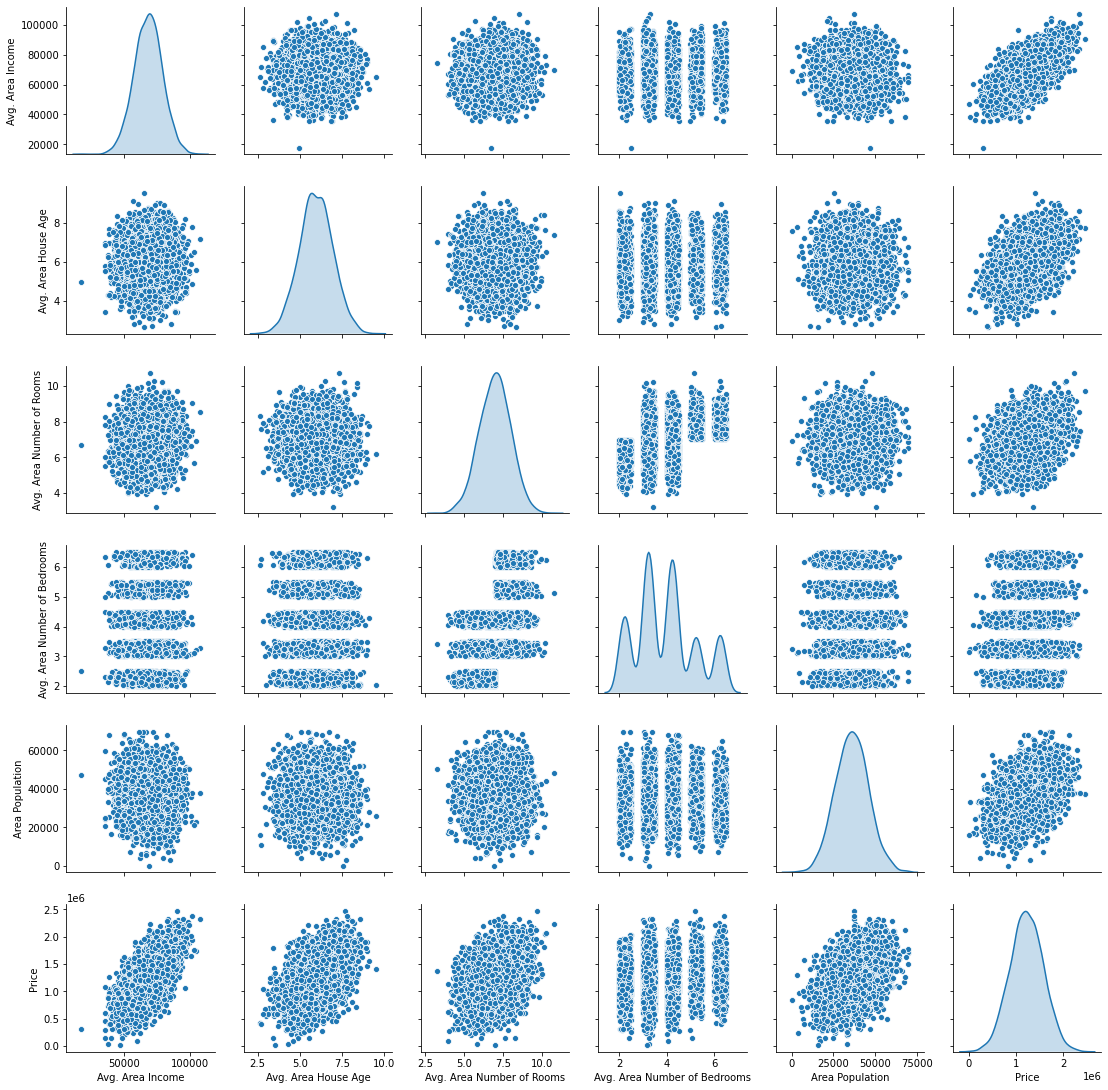

In [20]:
sns.pairplot(df,diag_kind='kde')

**Distribution of price (the predicted quantity)**

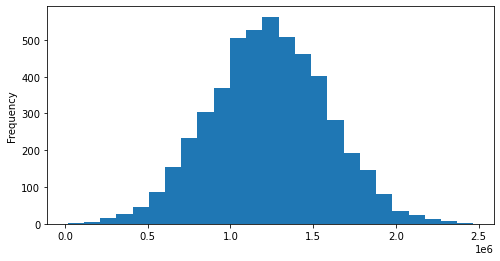

In [66]:
df['Price'].plot.hist(bins=25,figsize=(8,4))

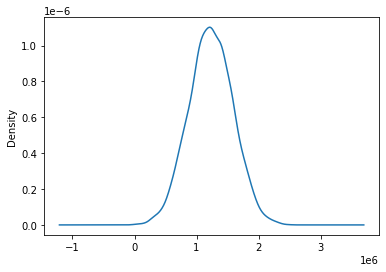

In [67]:
df['Price'].plot.density()

**Correlation matrix and heatmap**

In [68]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


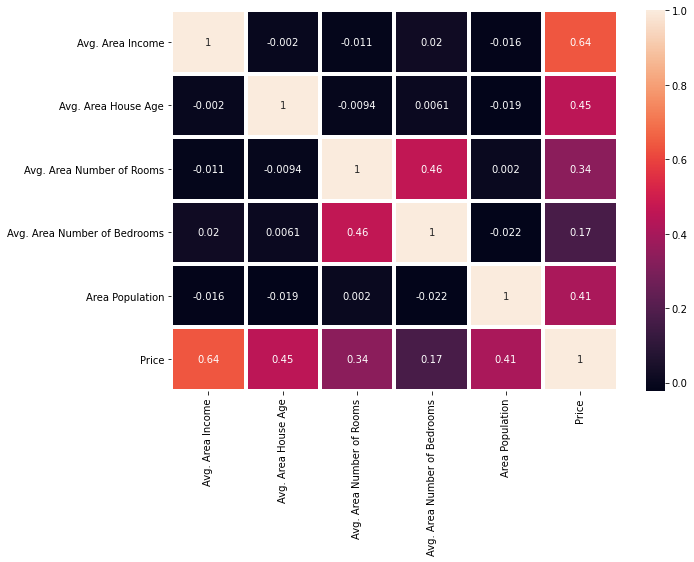

In [69]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=3)

**Put all the numerical features in X and Price in y, ignore Address which is string for linear regression**

In [21]:
X = df.drop(['Price','Address'], axis=1)
# the dependent variable
y = df[['Price']]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [32]:
print("Feature set size:",X.shape)
print("Variable set size:",y.shape)

Feature set size: (5000, 5)
Variable set size: (5000, 1)


In [33]:
print("Train set size of X:",X_train.shape)
print("Train set size of y:",y_train.shape)

Train set size of X: (3500, 5)
Train set size of y: (3500, 1)


In [34]:
print("Test set size of X:",X_test.shape)
print("Test set size of Y:",y_test.shape)

Test set size of X: (1500, 5)
Test set size of Y: (1500, 1)


In [75]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [76]:
y.head()

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05


### Model fit and training

**Import linear regression model estimator from scikit-learn and instantiate**

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [82]:
lm = LinearRegression() # Creating a Linear Regression object 'lm'

**Fit the model on to the instantiated object itself**

In [83]:
lm.fit(X_train,y_train) # Fit the linear model on to the 'lm' object itself i.e. no need to set this to another variable

LinearRegression()

**Check the intercept and coefficients and put them in a DataFrame**

In [84]:
print("The intercept term of the linear model:", lm.intercept_)

The intercept term of the linear model: [-2631028.90174654]


In [85]:
print("The coefficients of the linear model:", lm.coef_)

The coefficients of the linear model: [[2.15976020e+01 1.65201105e+05 1.19061464e+05 3.21258561e+03
  1.52281212e+01]]


In [86]:
train_pred = lm.predict(X_train)

In [87]:
metrics.mean_squared_error(y_train,train_pred)

10110916859.639555

In [88]:
test_pred = lm.predict(X_test)

In [89]:
metrics.mean_squared_error(y_test,test_pred)

10489638335.805431

In [90]:
metrics.mean_absolute_error(y_train,train_pred)

81257.11762033211

In [91]:
np.sqrt(metrics.mean_squared_error(y_train,train_pred))

100553.05494931298

**Prediction using the lm model**

In [92]:
predictions = lm.predict(X_test)
print ("Type of the predicted object:", type(predictions))
print ("Size of the predicted object:", predictions.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (1500, 1)


**Regression evaluation metrices for test**

In [93]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean absolute error (MAE): 81739.77482718206
Mean square error (MSE): 10489638335.805431
Root mean square error (RMSE): 102418.93543581397


**R-square value**

In [94]:
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

R-squared value of predictions: 0.919
